In [1]:
from ADnum_rev_timed import ADnum
import ADmath_rev as ADmath
import matplotlib.pyplot as plt
%matplotlib inline

from timeit import default_timer as timer

In [2]:
def speelpenning(N, v):
    inputs = [None]*N
    inputs[0] = ADnum(1, ins = N, ind = 0)
    f = inputs[0]
    for i in range(1, N):
        inputs[i] = ADnum(i, ins=N, ind=i)
        f = f*inputs[i]**v
    return f, inputs

In [3]:
def getrev(ins, func):
    for inputvar in ins:
        inputvar.revder(func)

In [4]:
Ns = [1, 2, 4, 8, 16, 32]

Text(0, 0.5, 'Time')

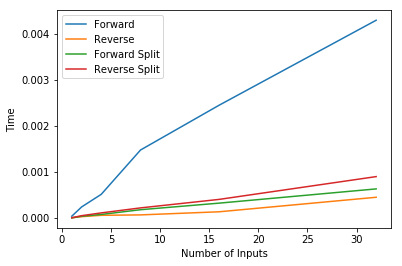

In [6]:
#speelpenning timings
forwardtimes = [None]*len(Ns)
forwardtimer = [None]*len(Ns)
revtimes = [None]*len(Ns)
revtimer = [None]*len(Ns)

for i, N in enumerate(Ns):
    startf = timer()
    f, inputs = speelpenning(N, 1)
    endf = timer()
    
    startr = timer()
    getrev(inputs, f)
    endr = timer()
    
    forwardtimes[i] =  endf-startf
    forwardtimer[i] = f.ftime
    revtimes[i] = endr-startr
    revtimer[i] = f.rtime+endr-startr
    
plt.plot(Ns, forwardtimes, label = 'Forward')
plt.plot(Ns, revtimes, label = 'Reverse')
plt.plot(Ns, forwardtimer, label = 'Forward Split')
plt.plot(Ns, revtimer, label = 'Reverse Split')
plt.legend()
plt.xlabel('Number of Inputs')
plt.ylabel('Time')
    

In [7]:
def speelpenningModified(inputs, v):
    f = inputs[0]**v
    for i in range(1, len(inputs)):
        f = f*inputs[i]**v
    return f

Text(0, 0.5, 'Time')

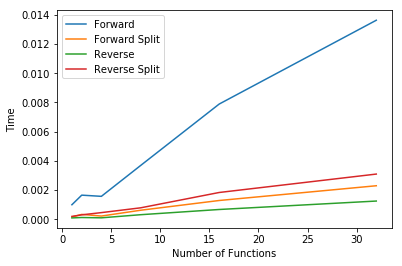

In [10]:
Ms = [1, 2, 4, 8, 16, 32]


forwardtimes = [None]*len(Ms)
forwardtimer = [None]*len(Ms)
revtimes = [None]*len(Ms)
revtimer = [None]*len(Ms)

for j, M in enumerate(Ms):
    forward = 0
    forwardtime = 0
    reverse = 0
    reversetime = 0
    F = [None]*M
    
    for i in range(M):
        inputs = [None]*4
        inputs[0] = ADnum(1, ins = 4, ind = 0)
        for k in range(1, 4):
            inputs[k] = ADnum(k, ins=4, ind=k)
    
        startf = timer()
        F[i] = speelpenningModified(inputs, i+1)
        endf = timer()
        forward = forward + (endf-startf)
        forwardtime = forwardtime+F[i].ftime
        
        startr = timer()
        getrev(inputs, F[i])
        endr = timer()
        reverse = reverse + (endr-startr)
        reversetime = reversetime+F[i].rtime+endr-startr
    forwardtimes[j]=forward
    forwardtimer[j] = forwardtime
    revtimes[j] = reverse
    revtimer[j] = reversetime
        
plt.plot(Ms, forwardtimes, label = 'Forward')
plt.plot(Ms, forwardtimer, label = 'Forward Split')
plt.plot(Ms, revtimes, label = 'Reverse')
plt.plot(Ms, revtimer, label = 'Reverse Split')
plt.legend()
plt.xlabel('Number of Functions')
plt.ylabel('Time')
        